In [1]:
import os, shutil
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras import layers, models
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = '/home/levan/scripts/ds_new/datasets/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
# # The path to the directory where the original
# # dataset was uncompressed
# original_dataset_dir = '/home/levan/scripts/ds_new/datasets/cats_dogs_init/train/'

# # The directory where we will
# # store our smaller dataset
# base_dir = '/home/levan/scripts/ds_new/datasets/cats_and_dogs_small'
# os.mkdir(base_dir)

# # Directories for our training,
# # validation and test splits
# train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

# # Directory with our training cat pictures
# train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

# # Directory with our training dog pictures
# train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

# # Directory with our validation cat pictures
# validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

# # Directory with our validation dog pictures
# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

# # Directory with our validation cat pictures
# test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

# # Directory with our validation dog pictures
# test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

# # Copy first 1000 cat images to train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)

# # Copy next 500 cat images to validation_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 cat images to test_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy first 1000 dog images to train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 dog images to validation_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 dog images to test_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# print('total training cat images:', len(os.listdir(train_cats_dir)))
# print('total training dog images:', len(os.listdir(train_dogs_dir)))

# print('total validation cat images:', len(os.listdir(validation_cats_dir)))
# print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

# print('total test cat images:', len(os.listdir(test_cats_dir)))
# print('total test dog images:', len(os.listdir(test_dogs_dir)))

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
for filters in [64, 128, 128]:
    model.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
model.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = RMSprop(lr = 1e-4))

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


0.0
(150, 150, 3)


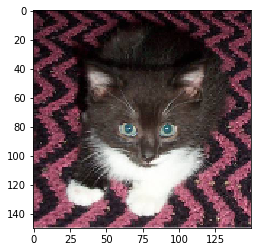

In [6]:
for data_batch, labels_batch in train_generator:
    print(labels_batch[0])
    print(data_batch[0].shape)
    plt.imshow(data_batch[0], cmap = 'hot')
    break

In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 125ms/step - loss: 0.6896 - acc: 0.5400 - val_loss: 0.6715 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 9s 92ms/step - loss: 0.6635 - acc: 0.5975 - val_loss: 0.6652 - val_acc: 0.5750
Epoch 3/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6164 - acc: 0.6635 - val_loss: 0.6190 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5630 - acc: 0.7085 - val_loss: 0.6489 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5416 - acc: 0.7170 - val_loss: 0.6420 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5232 - acc: 0.7310 - val_loss: 0.5680 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 9s 91ms/step - loss: 0.4894 - acc: 0.7650 - val_loss: 0.6119 - val_acc: 0.6700
Epoch 8/30
100/100 [==============================] - 9s 91ms/step 

In [9]:
model.save("/home/levan/scripts/ds_new/saved_models/cats_and_dogs_small_1.h5")

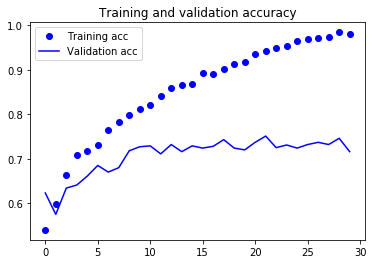

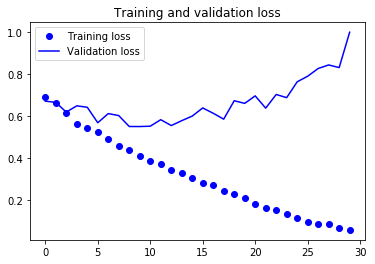

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

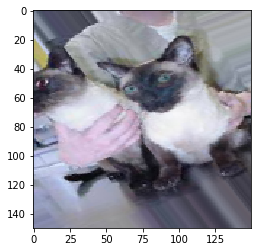

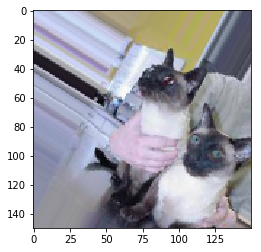

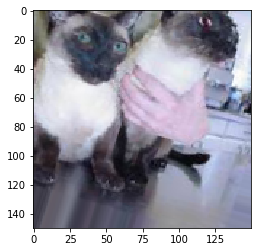

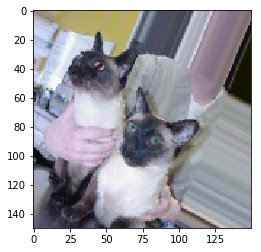

In [14]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

train_cats_dir = os.path.join(train_dir, 'cats')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
for filters in [64, 128, 128]:
    model.add(layers.Conv2D(filters, (3, 3), activation='relu'))
    model.add(layers.MaxPool2D((2, 2)))
    
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [16]:
model.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = RMSprop(lr = 1e-4))

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 23s 233ms/step - loss: 0.6887 - acc: 0.5290 - val_loss: 0.6679 - val_acc: 0.5863
Epoch 2/100
100/100 [==============================] - 21s 212ms/step - loss: 0.6725 - acc: 0.5732 - val_loss: 0.6668 - val_acc: 0.5692
Epoch 3/100
100/100 [==============================] - 21s 212ms/step - loss: 0.6570 - acc: 0.5999 - val_loss: 0.6470 - val_acc: 0.6034
Epoch 4/100
100/100 [==============================] - 21s 212ms/step - loss: 0.6404 - acc: 0.6253 - val_loss: 0.6252 - val_acc: 0.6421
Epoch 5/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6138 - acc: 0.6661 - val_loss: 0.6549 - val_acc: 0.5984
Epoch 6/100
100/100 [==============================] - 23s 225ms/step - loss: 0.5959 - acc: 0.6768 - val_loss: 0.5943 - val_acc: 0.6802
Epoch 7/100
100/100 [==============================] - 21s 214ms/step - loss: 0.5974 - acc: 0.6778 -

In [18]:
model.save("/home/levan/scripts/ds_new/saved_models/cats_and_dogs_small_2.h5")